In [1]:
# import libraries
import math
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# read csv file & create data frame
df = pd.read_csv('bsc5.csv')

##### run sanity checks

In [3]:
df.shape

(9110, 53)

In [4]:
df.head(5)

,HR,Name,DM,HD,SAO,FK5,IRflag,r_IRflag,Multiple,ADS,...,RadVel,n_RadVel,l_RotVel,RotVel,u_RotVel,Dmag,Sep,MultID,MultCnt,NoteFlag
0,1,,BD+44 4550,3,36042,,,,,46,...,018,,,195,,4.2,21.6,AC,3,NaN
1,2,,BD-01 4525,6,128569,,,,,,...,014,V,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,33 Psc,BD-06 6357,28,128572,1002,I,,,,...,006,SB1O,<,17,,2.5,0.0,,3,*
3,4,86 Peg,BD+12 5063,87,91701,2004,,,,,...,002,V?,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,,BD+57 2865,123,21085,,,,,61,...,012,V,,,,0.8,1.4,,,*


In [5]:
df.tail(5)

,HR,Name,DM,HD,SAO,FK5,IRflag,r_IRflag,Multiple,ADS,...,RadVel,n_RadVel,l_RotVel,RotVel,u_RotVel,Dmag,Sep,MultID,MultCnt,NoteFlag
9105,9106,,CP-73 2346,225233,255629,,,,,,...,008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9106,9107,,BD+33 4828,225239,53622,2002,,,,,...,004,V,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9107,9108,,CP-72 2800,225253,255631,1001,,,,,...,003,V,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9108,9109,,BD+25 5068,225276,73731,,I,,,42,...,005,,,,,4.5,17.5,NaN,NaN,NaN
9109,9110,,BD+60 2667,225289,10962,,,,,,...,014,V,,50,,,,,,*


In [6]:
df.describe()

,HR
count,9110.00000
mean,4555.50000
std,2629.97481
min,1.00000
25%,2278.25000
50%,4555.50000
75%,6832.75000
max,9110.00000


In [7]:
df.info

<bound method DataFrame.info of         HR        Name           DM      HD     SAO   FK5 IRflag r_IRflag  \
0        1              BD+44 4550        3   36042                         
1        2              BD-01 4525        6  128569                         
2        3   33    Psc  BD-06 6357       28  128572  1002      I            
3        4   86    Peg  BD+12 5063       87   91701  2004                   
4        5              BD+57 2865      123   21085                         
...    ...         ...          ...     ...     ...   ...    ...      ...   
9105  9106              CP-73 2346   225233  255629                         
9106  9107              BD+33 4828   225239   53622  2002                   
9107  9108              CP-72 2800   225253  255631  1001                   
9108  9109              BD+25 5068   225276   73731            I            
9109  9110              BD+60 2667   225289   10962                         

     Multiple    ADS  ... RadVel n_RadVel l

##### new dataframe with ra (right ascension) and dc (declination) in degrees

In [8]:
# import new libraries
from astropy.coordinates import SkyCoord
from astropy.coordinates import Angle
import astropy.units as u

In [9]:
# dataframe of right ascension and declination in hours, mins, secs
df_radc = df[['RAh', 'RAm', 'RAs','DEd','DEm','DEs']]

In [10]:
# make the data frame into integers and drop null values
df_radc = df_radc.apply(pd.to_numeric, errors='coerce', downcast='integer')
df_radc['SpType'] = df['SpType']
df_radc = df_radc.dropna()

In [11]:
# check for null values
df_radc.isnull().sum()

RAh       0
RAm       0
RAs       0
DEd       0
DEm       0
DEs       0
SpType    0
dtype: int64

In [12]:
# check data frame
df_radc

,RAh,RAm,RAs,DEd,DEm,DEs,SpType
0,0.0,5.0,9.9,45.0,13.0,45.0,A1Vn
1,0.0,5.0,3.8,0.0,30.0,11.0,gG9
2,0.0,5.0,20.1,5.0,42.0,27.0,K0IIIbCN-0.5
3,0.0,5.0,42.0,13.0,23.0,46.0,G5III
4,0.0,6.0,16.0,58.0,26.0,12.0,G5V
...,...,...,...,...,...,...,...
9105,0.0,4.0,30.7,72.0,53.0,52.0,F2V
9106,0.0,4.0,53.8,34.0,39.0,35.0,G2V
9107,0.0,4.0,41.3,71.0,26.0,13.0,B8IV-V
9108,0.0,4.0,56.0,26.0,38.0,56.0,K4IIIb


In [13]:
# create RA and DE in decimal digits
df_radc['RA'] = (df_radc['RAh'].values) + (df_radc['RAm'].values / 60) + (df_radc['RAs'].values / 3600)
df_radc['DE'] = (df_radc['DEd'].values) + (df_radc['DEm'].values / 60) + (df_radc['DEs'].values / 3600)

In [14]:
# look at updated dataframe
df_radc

,RAh,RAm,RAs,DEd,DEm,DEs,SpType,RA,DE
0,0.0,5.0,9.9,45.0,13.0,45.0,A1Vn,0.086083,45.229167
1,0.0,5.0,3.8,0.0,30.0,11.0,gG9,0.084389,0.503056
2,0.0,5.0,20.1,5.0,42.0,27.0,K0IIIbCN-0.5,0.088917,5.707500
3,0.0,5.0,42.0,13.0,23.0,46.0,G5III,0.095000,13.396111
4,0.0,6.0,16.0,58.0,26.0,12.0,G5V,0.104444,58.436667
...,...,...,...,...,...,...,...,...,...
9105,0.0,4.0,30.7,72.0,53.0,52.0,F2V,0.075194,72.897778
9106,0.0,4.0,53.8,34.0,39.0,35.0,G2V,0.081611,34.659722
9107,0.0,4.0,41.3,71.0,26.0,13.0,B8IV-V,0.078139,71.436944
9108,0.0,4.0,56.0,26.0,38.0,56.0,K4IIIb,0.082222,26.648889


In [15]:
# create columns long and lat of galactic long and galactic lat
galactic_long = []
galactic_lat = []

for i, row in df_radc.iterrows():
    ra_deg = row['RA']
    dec_deg = row['DE']
    
    c = SkyCoord(ra=ra_deg * u.deg, dec=dec_deg * u.deg, frame='icrs')
    galactic_coord = c.galactic
   
    galactic_long.append(galactic_coord.l.degree - math.pi)
    galactic_lat.append(galactic_coord.b.degree)

df_radc['Galactic Longitude'] = galactic_long
df_radc['Galactic Latitude'] = galactic_lat

In [16]:
# check dataframe
df_radc

,RAh,RAm,RAs,DEd,DEm,DEs,SpType,RA,DE,Galactic Longitude,Galactic Latitude
0,0.0,5.0,9.9,45.0,13.0,45.0,A1Vn,0.086083,45.229167,110.433716,-16.712314
1,0.0,5.0,3.8,0.0,30.0,11.0,gG9,0.084389,0.503056,93.747348,-59.759612
2,0.0,5.0,20.1,5.0,42.0,27.0,K0IIIbCN-0.5,0.088917,5.707500,97.290285,-54.917168
3,0.0,5.0,42.0,13.0,23.0,46.0,G5III,0.095000,13.396111,101.194411,-47.623639
4,0.0,6.0,16.0,58.0,26.0,12.0,G5V,0.104444,58.436667,113.139517,-3.774713
...,...,...,...,...,...,...,...,...,...,...,...
9105,0.0,4.0,30.7,72.0,53.0,52.0,F2V,0.075194,72.897778,115.996789,10.403762
9106,0.0,4.0,53.8,34.0,39.0,35.0,G2V,0.081611,34.659722,108.004761,-27.039606
9107,0.0,4.0,41.3,71.0,26.0,13.0,B8IV-V,0.078139,71.436944,115.701625,8.972194
9108,0.0,4.0,56.0,26.0,38.0,56.0,K4IIIb,0.082222,26.648889,105.855018,-34.836049


##### assign colors to spectral type

In [17]:
# define a dictionary of letter to color
color_dict = {'O': 'm','B': 'b','A': 'c','F': 'g','G': 'y','K':'tab:orange','M':'r'}

In [18]:
# function creating color for each spectral type
def spectral_color(type):
    first_letter = type[0].upper() 
    return color_dict.get(first_letter, 'k')

In [19]:
# create new column of star color
colors = []
for i, row in df_radc.iterrows():
    spectral_types = row['SpType'].strip()
    color = spectral_color(spectral_types)
    colors.append(color)
df_radc['Color'] = colors

In [20]:
# check data frame
df_radc

,RAh,RAm,RAs,DEd,DEm,DEs,SpType,RA,DE,Galactic Longitude,Galactic Latitude,Color
0,0.0,5.0,9.9,45.0,13.0,45.0,A1Vn,0.086083,45.229167,110.433716,-16.712314,c
1,0.0,5.0,3.8,0.0,30.0,11.0,gG9,0.084389,0.503056,93.747348,-59.759612,y
2,0.0,5.0,20.1,5.0,42.0,27.0,K0IIIbCN-0.5,0.088917,5.707500,97.290285,-54.917168,tab:orange
3,0.0,5.0,42.0,13.0,23.0,46.0,G5III,0.095000,13.396111,101.194411,-47.623639,y
4,0.0,6.0,16.0,58.0,26.0,12.0,G5V,0.104444,58.436667,113.139517,-3.774713,y
...,...,...,...,...,...,...,...,...,...,...,...,...
9105,0.0,4.0,30.7,72.0,53.0,52.0,F2V,0.075194,72.897778,115.996789,10.403762,g
9106,0.0,4.0,53.8,34.0,39.0,35.0,G2V,0.081611,34.659722,108.004761,-27.039606,y
9107,0.0,4.0,41.3,71.0,26.0,13.0,B8IV-V,0.078139,71.436944,115.701625,8.972194,b
9108,0.0,4.0,56.0,26.0,38.0,56.0,K4IIIb,0.082222,26.648889,105.855018,-34.836049,tab:orange


##### create sky plots

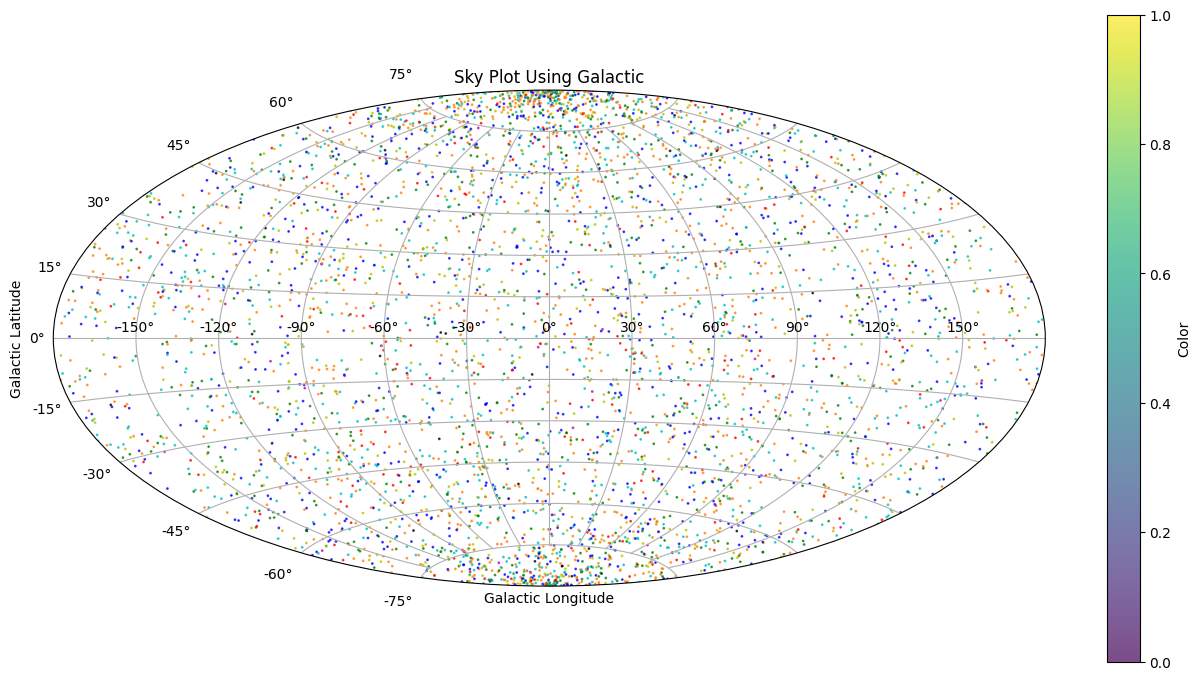

In [24]:
# create sky plot
plt.figure (figsize = (16, 8.4))
plt.subplot (projection = "aitoff")
plt.title ("Map of the sky")
plt.scatter(df_radc['Galactic Longitude'], df_radc['Galactic Latitude'], c=df_radc['Color'], s=1, alpha=0.7)

# add labels
plt.xlabel('Galactic Longitude')
plt.ylabel('Galactic Latitude')
plt.title('Sky Plot Using Galactic')
plt.colorbar(label='Color')
plt.grid()
plt.show()

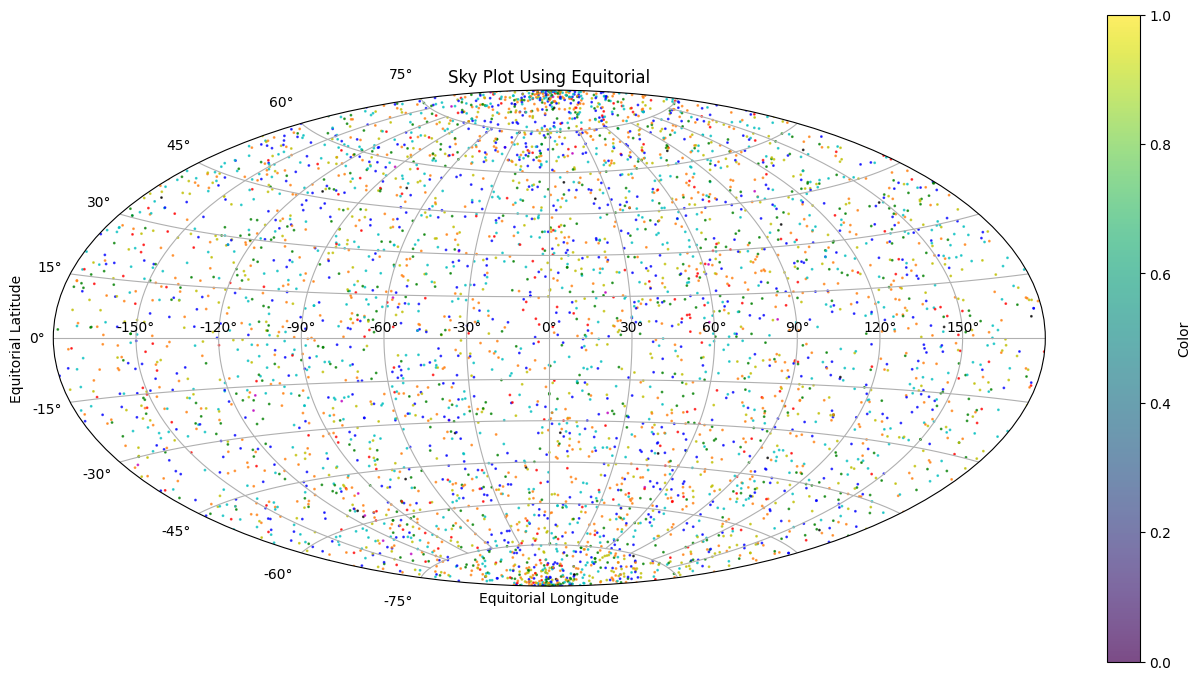

In [25]:
# create sky plot
plt.figure (figsize = (16, 8.4))
plt.subplot (projection = "aitoff")
plt.title ("Map of the sky")
plt.scatter(df_radc['RA'], df_radc['DE'], c=df_radc['Color'], s=1, alpha=0.7)

# add labels
plt.xlabel('Equitorial Longitude')
plt.ylabel('Equitorial Latitude')
plt.title('Sky Plot Using Equitorial')
plt.colorbar(label='Color')
plt.grid()
plt.show()